# Interact Demo with `interactive` and `InteractBase`

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/asaboor-gh/einteract/HEAD?urlpath=%2Fdoc%2Ftree%2Feinteract-demo.ipynb)

This notebook demonstrates how to use the `interactive` function and the `InteractBase` class from the `einteract` package to create interactive widgets in Jupyter Notebook.

We'll show two examples:
1. Using `interactive` to interact with multiple functions.
2. Using `InteractBase` to create a custom interactive widget.

**Note:** For better content representation, use same functionality under [ipyslides](https://github.com/asaboor-gh/ipyslides).

Below two images show the outputs generated by cells after this:

**A simple example**
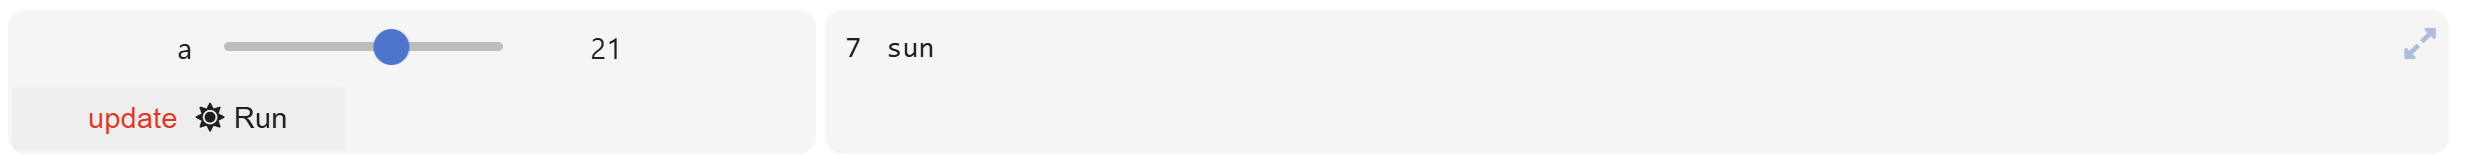
**A comprehensive example**
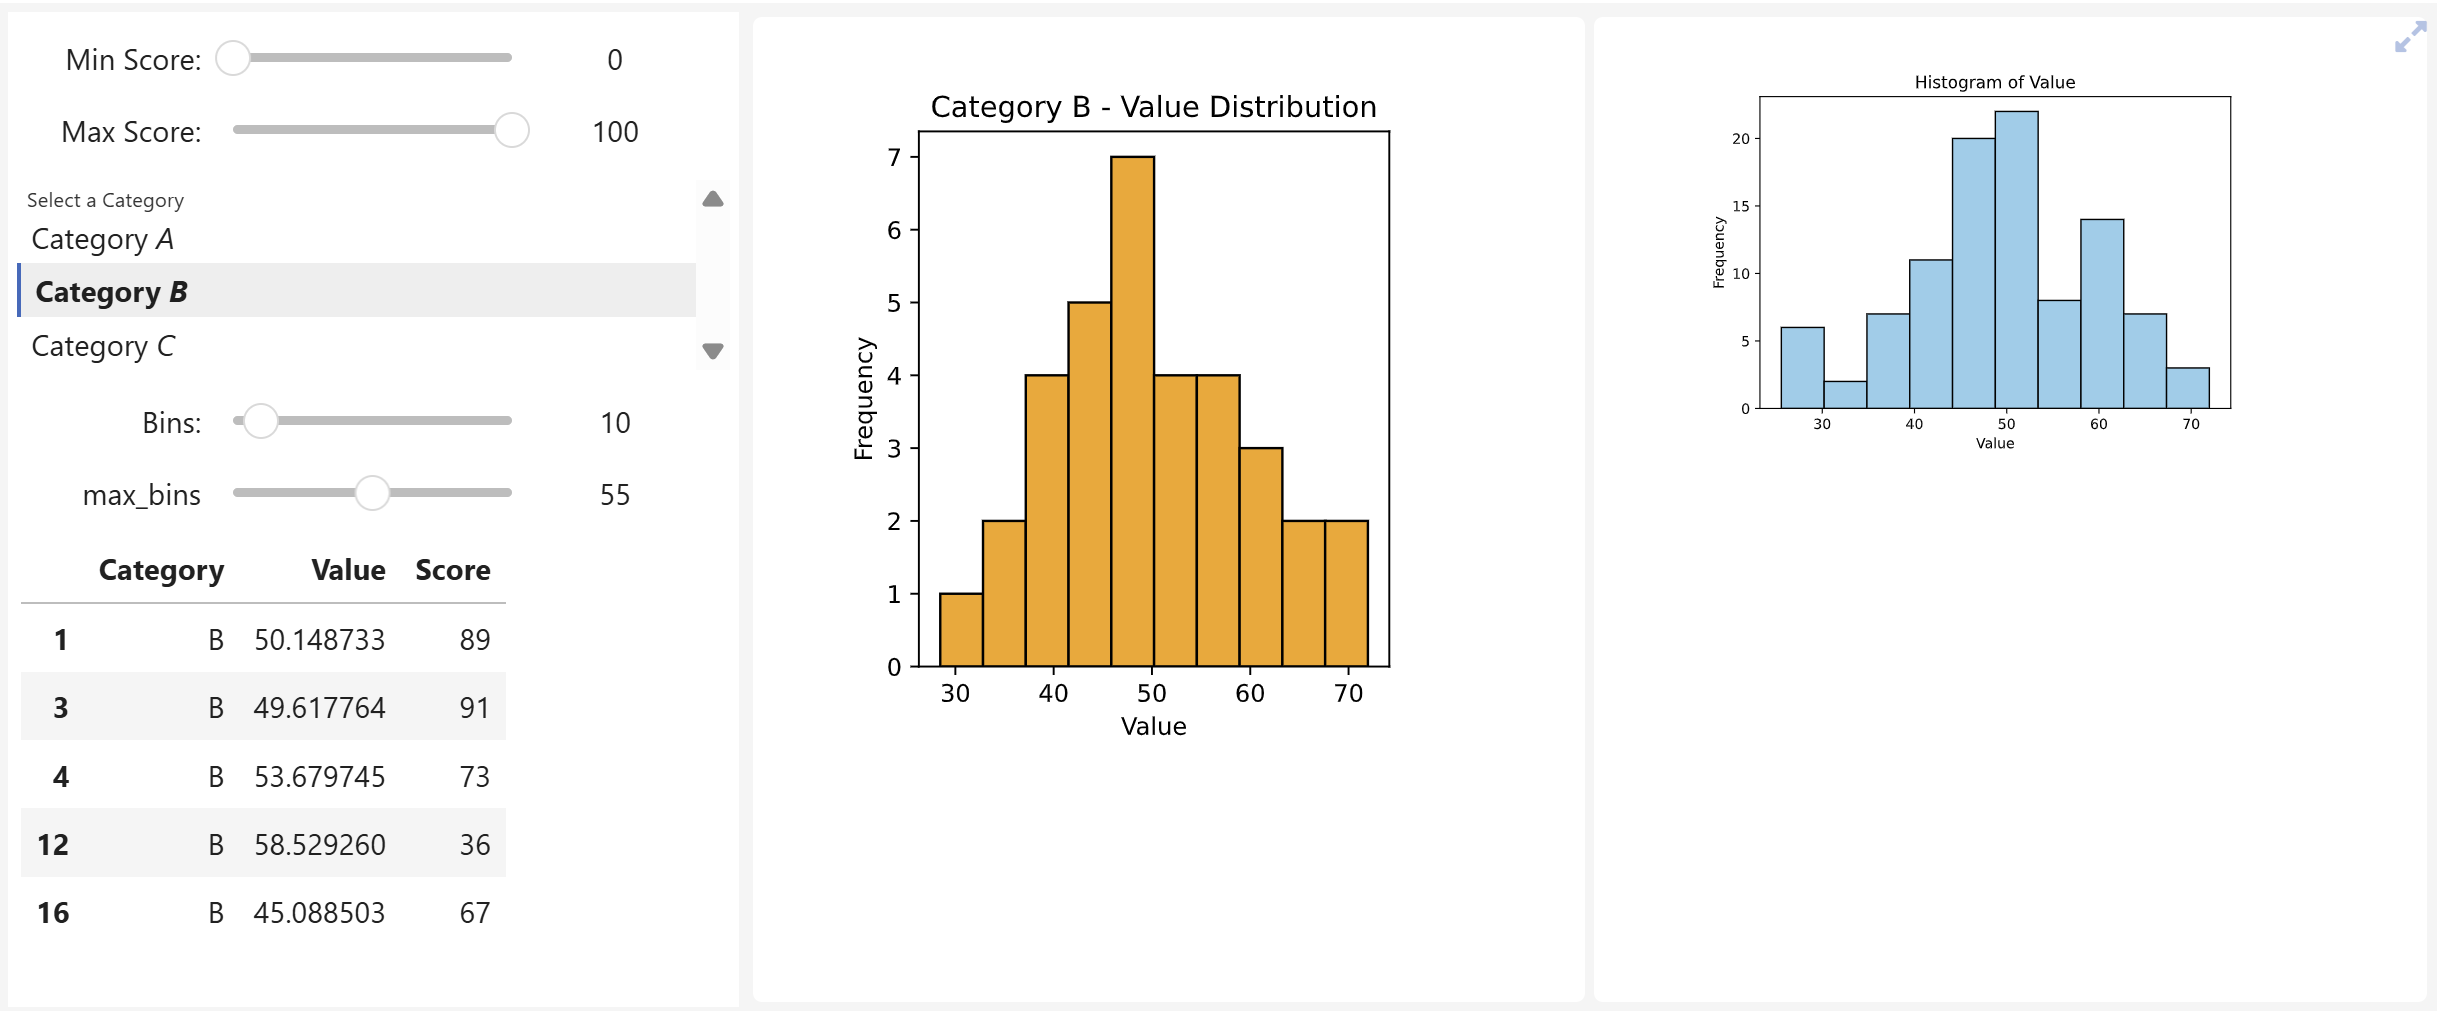

**Plotly Selection example**
![einteract.gif](einteract.gif)


In [ ]:
import ipywidgets as ipw
import einteract as ei

@ei.callback('out-print') # create separate output
def myprint(a, b): # b is a btn, so it will run on click
    print('a: ', a) 
    b.icon = 'sun' if b.icon == 'moon' else 'moon'

ei.interactive(myprint, # multiple functions accepted
    lambda c: print('c: ',c), # this captured by out-main class, this will run on slider change, not held by button
    a = 15, # a slider
    b = ipw.Button(description='Run', icon = 'moon', tooltip='update'), # not just value widgets
    c = 'b.icon', # observe icon of button
    app_layout=dict( # can set later
        left_sidebar = ['a','b'],
        center = [(ipw.HBox(), ('out-print','out-main'))],
        pane_widths = [2,3,0]
    ),
    grid_css = {
        '> *': {'background': 'whitesmoke','border-radius': '8px'}
    }
)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
import einteract as ei

categories = ['A', 'B', 'C'] 
# Sample DataFrame
np.random.seed(0)
data = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C'], size=100),
    'Value': np.random.randn(100) * 10 + 50,
    'Score': np.random.randint(0, 100, size=100)
})

# Interactive Plotting
@ei.callback('out-bar2', timeit=True)
def plot_histogram(bins, category):
    column='Value'
    plt.figure(figsize=(6,4))
    plt.hist(data[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    ei.plt2html().display()


# Dynamic Data Filtering
def filter_data(bmax, category, min_score=0, max_score=100):
    filtered = data[
        (data['Category'] == category) &
        (data['Score'] >= min_score) &
        (data['Score'] <= max_score)
    ]
    display(filtered.head())

# Custom Widget Layouts
@ei.callback('out-bar1',timeit=True, debounce=2000)
def custom_ui(category, bins,max_score, min_score):
    subset = data[data['Category'] == category]
    plt.figure(figsize=(3.5,4))
    plt.hist(subset['Value'], bins=bins, color='orange', edgecolor='black')
    plt.title(f'Category {category} - Value Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    ei.plt2html().display()

def set_bins_max(wbins,max_bins):
    wbins.max = max_bins # changing other widget traits

it = ei.interactive(
    filter_data, # captured on out-main
    custom_ui,
    plot_histogram, 
    set_bins_max,
    category= ei.ListWidget(transform=lambda c: f'Category <em>{c}</em>', options=categories, description='Select a Category'),
    min_score=ipw.IntSlider(min=0, max=100, value=0, description='Min Score:'),
    max_score=ipw.IntSlider(min=0, max=100, value=100, description='Max Score:'),
    wbins = ipw.fixed(ipw.IntSlider(min=5, max=30, value=10, description='Bins:')), # passed as widget
    bins = 'wbins.value', # observe value
    max_bins = (10,100),
    bmax = 'wbins.max', # observe max value

    app_layout = {
        'left_sidebar': ['min_score', 'max_score', 'category', 'wbins','max_bins', 'out-main'], 
        'center': ['out-bar1','out-bar2'],
        'pane_widths': ['25em','1fr','0'], 'height': '450px'}
)
it

Let's make above dashboard a little better with CSS.

In [ ]:
it.set_css({
    'grid-gap': '4px',
    'padding': '4px',
    'background': 'whitesmoke',
    '.left-sidebar': {'background': 'white','padding':'4px'},
    '.center': {'grid-template-columns': '1fr 1fr',},
    '.center > *': {
        'background': 'white',
        'border-radius': '4px',
        'grid-gap': '8px',
    }
})

# Same app as above through `InteractBase` class

In [ ]:
import einteract as ei
class MyInteract(ei.InteractBase):
    def __init__(self, auto_update=True):
        super().__init__(auto_update= auto_update, # runtime decision
            grid_css = {
                'grid-gap': '4px',
                'padding': '4px',
                'background': 'whitesmoke',
                '.left-sidebar': {'background': 'white','padding':'4px'},
                '.center': {'grid-template-columns': '1fr 1fr',},
                '.center > *': {
                    'background': 'white',
                    'border-radius': '4px',
                    'grid-gap': '8px',
                }
            },
            app_layout = {
                'left_sidebar': ['min_score', 'max_score', 'category', 'wbins','max_bins', 'out-main'], 
                'center': ['out-bar1','out-bar2'],
                'pane_widths': ['25em','1fr','0'], 'height': '450px',
            })
    def _interactive_params(self):
        return dict(
            category= ei.ListWidget(transform=lambda c: f'Category <em>{c}</em>', options=categories, description='Select a Category'),
            min_score=ipw.IntSlider(min=0, max=100, value=0, description='Min Score:'),
            max_score=ipw.IntSlider(min=0, max=100, value=100, description='Max Score:'),
            wbins = ipw.fixed(ipw.IntSlider(min=5, max=30, value=10, description='Bins:')), # passed as widget
            bins = 'wbins.value',
            max_bins = (10,100),
            bmax = 'wbins.max', # observe max value
        )

    @ei.callback
    def filter_data(self, bmax, category, min_score=0, max_score=100):
        filtered = data[
            (data['Category'] == category) &
            (data['Score'] >= min_score) &
            (data['Score'] <= max_score)
        ]
        display(filtered.head())
    
    @ei.callback('out-bar1',timeit=True)
    def custom_ui(self, category, bins,max_score, min_score):
        subset = data[data['Category'] == category]
        plt.figure(figsize=(3.5,4))
        plt.hist(subset['Value'], bins=bins, color='orange', edgecolor='black')
        plt.title(f'Category {category} - Value Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        ei.plt2html().display()

    @ei.callback('out-bar2',timeit=True, throttle=200) # limit callback rate
    def plot_histogram(self, bins, category):
        column='Value'
        plt.figure(figsize=(6,4))
        plt.hist(data[column], bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        ei.plt2html().display()

    @ei.callback
    def set_bins_max(self, wbins,max_bins):
        wbins.max = max_bins # changing other widget traits

    
MyInteract()

### Plotly's FigureWidget selections

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
import pandas as pd
import plotly.graph_objects as go

import einteract as ei

class MyDashboard(ei.InteractBase):
    def _interactive_params(self):
        return dict(
            fig = ei.patched_plotly(go.FigureWidget()), 
            html = ipw.HTML('**Select Box/Lesso on figure traces**'),
            A = (1,10), omega = (0,20), phi = (0,10),
            sdata = 'fig.selected', cdata = 'fig.clicked', fs = '.isfullscreen',
        )
    @ei.callback
    def plot(self, fig:go.FigureWidget, A, omega,phi): # adding type hint allows auto-completion inside function
        fig.data = []
        x = np.linspace(0,10,100)
        fig.add_trace(go.Scatter(x=x, y=A*np.sin(omega*x + phi), mode='lines+markers'))

    @ei.callback('out-click')
    def on_click(self, cdata,html):
        display(pd.DataFrame(cdata or {}))
    
    @ei.callback
    def on_select(self, sdata, html):
        plt.scatter(sdata.get('xs',[]),sdata.get('ys',[]))
        html.value = ei.plt2html(caption='This plot **alert`receives`** selected data').value
    
    @ei.callback
    def detect_fs(self,fig, fs):
        print("isfullscreen = ",fs)
        fig.layout.autosize = False # double trigger
        fig.layout.autosize = True

MyDashboard(
    app_layout={
        'left_sidebar':[
            ei.html("# Plotly's click/selet demo\nChange controls, `click` and `slection` on fig to right to alert`see effect`"),
            'A','omega','phi',
            'html','out-main',
        ], 
        'center': ['fig', ei.hstack(["clicked data color['navy']`appears` below!","right column"]), 'out-click'],
        'pane_widths':[3,7,0]},
    grid_css={
        '.left-sidebar':{'background':'whitesmoke'},
        ':fullscreen': {'height': '100vh'},
    }, 
)